Importing Libraries

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense,MaxPool2D
import numpy as np
from keras.preprocessing import image
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
try:
    from tensorflow.python.util import module_wrapper as deprecation
except ImportError:
    from tensorflow.python.util import deprecation_wrapper as deprecation


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Dataset and Image Preprocessing

In [ ]:
nbatch = 128
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ds/training',
                                                 target_size=(128,128),
                                                 batch_size =nbatch,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/ds/test',
                                            target_size=(128,128),
                                            batch_size =nbatch,
                                            class_mode = 'binary')


Found 1437 images belonging to 2 classes.
Found 604 images belonging to 2 classes.


Text(0.5, 0, 'Class')

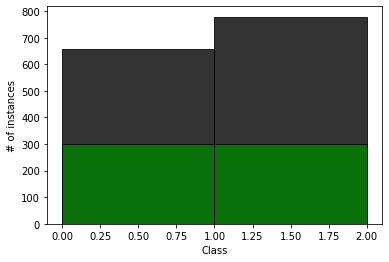

In [ ]:
h1 = plt.hist(training_set.classes, bins=range(0,3), alpha=0.8, color='black', edgecolor='black')
h2 = plt.hist(test_set.classes,  bins=range(0,3), alpha=0.8, color='green', edgecolor='black')
plt.ylabel('# of instances')
plt.xlabel('Class')

(128, 128, 128, 3) (128,)


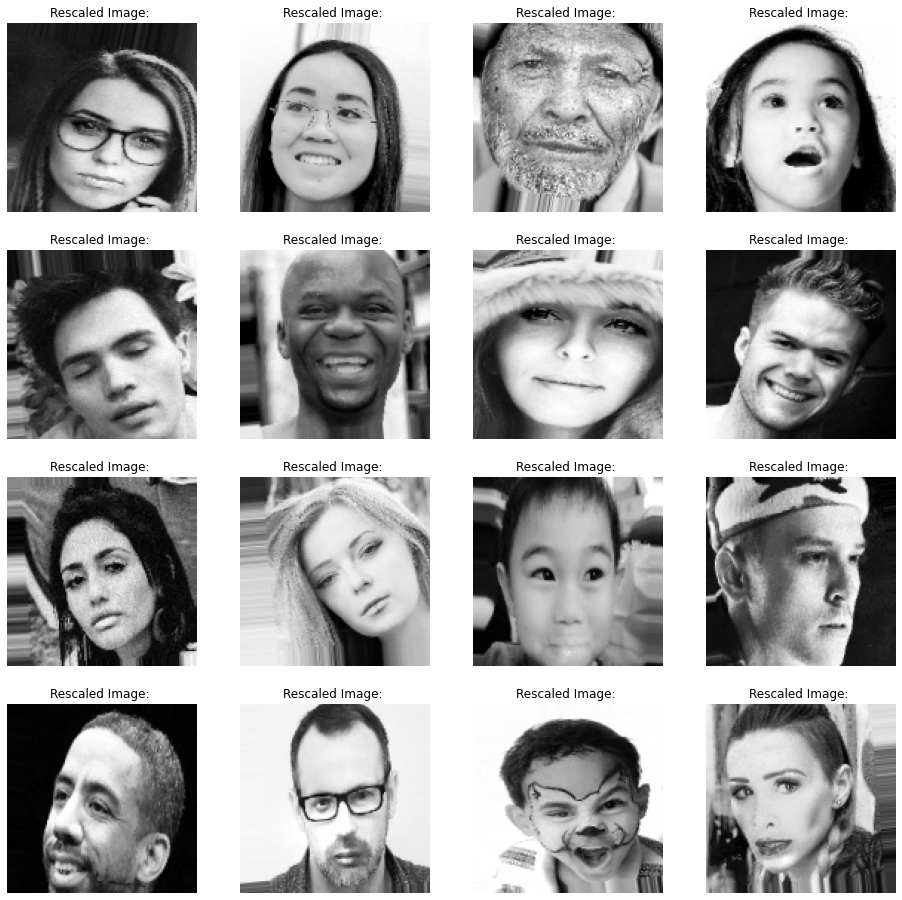

In [ ]:
for X, y in training_set:
    print(X.shape, y.shape)
    plt.figure(figsize=(16,16))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.axis('off')
        plt.title('Rescaled Image: ')
        img = np.uint8(255*X[i,:,:,0])
        plt.imshow(img, cmap='gray')
    break

VGG 16 Architecture Model

In [ ]:
model = Sequential()

model.add(Conv2D(input_shape=(128,128,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                    

Compiling the Model

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])


Saving model


In [ ]:
model.save("fake_face.h5")

Training the Model


In [ ]:
callbacks_list = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='model_checkpoint.hdf5', monitor='val_loss', save_best_only=True, mode ='max'),
]

In [ ]:
history = model.fit(
        training_set,
        steps_per_epoch=10,
        epochs=10,
        validation_data=test_set,
        validation_steps=5,
        callbacks = callbacks_list
    )

Epoch 1/10
10/10 [==============================] - 1005s 100s/step - loss: 0.8812 - accuracy: 0.5191 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 936s 94s/step - loss: 0.6918 - accuracy: 0.5414 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 906s 90s/step - loss: 0.6902 - accuracy: 0.5461 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 4/10
10/10 [==============================] - 899s 97s/step - loss: 0.6906 - accuracy: 0.5461 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 5/10
10/10 [==============================] - 907s 91s/step - loss: 0.6911 - accuracy: 0.5326 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 6/10
10/10 [==============================] - 894s 89s/step - loss: 0.6912 - accuracy: 0.5309 - val_loss: 0.6953 - val_accuracy: 0.5000
Epoch 7/10
10/10 [==============================] - 879s 88s/step - loss: 0.6904 - accuracy: 0.5368 - val_loss: 0.6957 - val_accuracy: 0.5000
Epoc

In [ ]:
model.save("fake_face.h5")

In [ ]:
training_set.class_indices

{'fake': 0, 'real': 1}

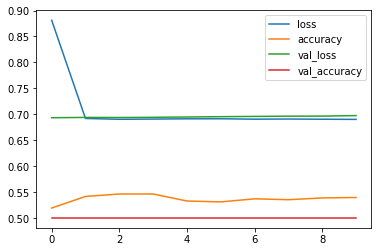

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


Text(0.5, 0, '# of epochs')

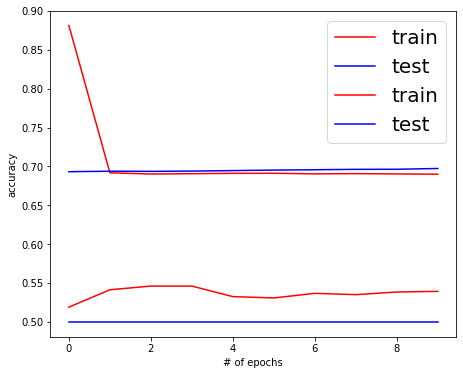

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
nepochs=len(history.history['loss'])
plt.plot(range(nepochs),history.history['loss'],'r-', label='train')
plt.plot(range(nepochs),history.history['val_loss'],'b-', label='test')
plt.legend(prop={'size': 20})
plt.ylabel('loss')
plt.xlabel('# of epochs')
plt.subplot(1,2,1)
plt.plot(range(nepochs), history.history['accuracy'],'r-',label='train')
plt.plot(range(nepochs), history.history['val_accuracy'], 'b-', label='test')
plt.legend(prop={'size': 20})
plt.ylabel('accuracy')
plt.xlabel('# of epochs')

Another Model:

In [ ]:
model_1 = Sequential()

model_1.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(128,128,3)))

model_1.add(MaxPool2D(pool_size=(2,2)))

model_1.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu'))

model_1.add(MaxPool2D(pool_size=(2,2)))
model_1.add(Conv2D(128, kernel_size=(3, 3),
                 activation='relu'))

model_1.add(MaxPool2D(pool_size=(2,2)))

model_1.add(Flatten())

model_1.add(Dense(activation="relu",
                units=256))

model_1.add(Dense(activation="sigmoid",
                units=1))

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [ ]:
model_1.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
callbacks_list_1 = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='model_checkpoint.hdf5', monitor='val_loss', save_best_only=True, mode ='max'),
]

In [ ]:
history_1 = model_1.fit_generator(
        training_set,
        steps_per_epoch=10,
        epochs=10,
        validation_data=test_set,
        validation_steps=5,
        callbacks = callbacks_list_1
    )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
10/10 [==============================] - 247s 26s/step - loss: 0.8014 - accuracy: 0.5273 - val_loss: 0.6978 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 72s 7s/step - loss: 0.6942 - accuracy: 0.5359 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 70s 7s/step - loss: 0.6915 - accuracy: 0.5398 - val_loss: 0.6980 - val_accuracy: 0.5000
Epoch 4/10
10/10 [==============================] - 65s 6s/step - loss: 0.6920 - accuracy: 0.5402 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 5/10
10/10 [==============================] - 72s 7s/step - loss: 0.6914 - accuracy: 0.5437 - val_loss: 0.6908 - val_accuracy: 0.5000
Epoch 6/10
10/10 [==============================] - 65s 6s/step - loss: 0.6922 - accuracy: 0.5411 - val_loss: 0.6913 - val_accuracy: 0.5000
Epoch 7/10
10/10 [==============================] - 65s 7s/step - loss: 0.6896 - accuracy: 0.5487 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 8/10
10/10 [

In [ ]:
training_set.class_indices

{'fake': 0, 'real': 1}

Text(0.5, 0, '# of epochs')

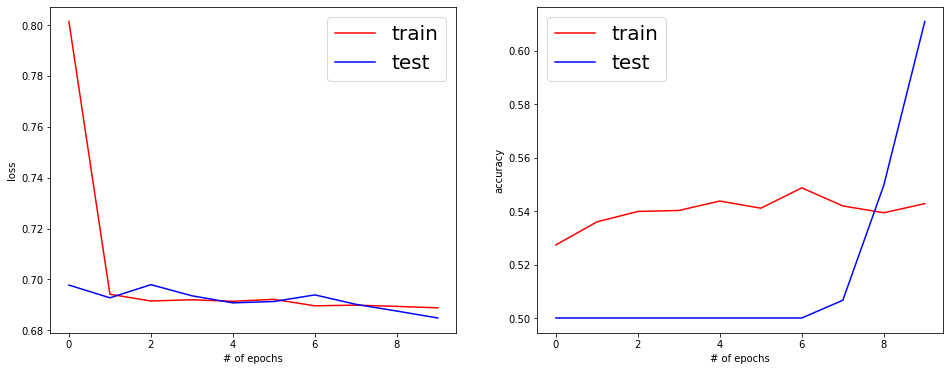

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
nepochs=len(history_1.history['loss'])
plt.plot(range(nepochs), history_1.history['loss'],     'r-', label='train')
plt.plot(range(nepochs), history_1.history['val_loss'], 'b-', label='test')
plt.legend(prop={'size': 20})
plt.ylabel('loss')
plt.xlabel('# of epochs')
plt.subplot(1,2,2)
plt.plot(range(nepochs), history_1.history['accuracy'],     'r-', label='train')
plt.plot(range(nepochs), history_1.history['val_accuracy'], 'b-', label='test')
plt.legend(prop={'size': 20})
plt.ylabel('accuracy')
plt.xlabel('# of epochs')

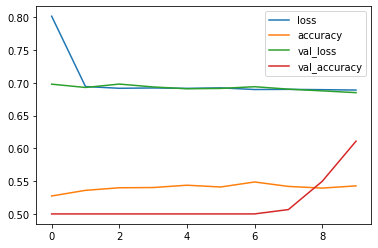

In [ ]:
import pandas as pd
pd.DataFrame(history_1.history).plot()